In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('Downloads/gpa.csv')

In [3]:
data

,HS GPA,SAT Score
0,3.4,1270
1,4.0,1220
2,3.8,1160
3,3.8,950
4,4.0,1070
...,...,...
995,3.7,1000
996,3.3,1080
997,3.5,1140
998,2.3,1200


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   HS GPA     1000 non-null   float64
 1   SAT Score  1000 non-null   int64  
dtypes: float64(1), int64(1)
memory usage: 15.8 KB


In [5]:
data.describe()

,HS GPA,SAT Score
count,1000.000000,1000.000000
mean,3.203700,1033.290000
std,0.542541,142.873681
min,1.800000,530.000000
25%,2.800000,930.000000
50%,3.200000,1030.000000
75%,3.700000,1130.000000
max,4.500000,1440.000000


In [6]:
data.isnull().sum()

HS GPA       0
SAT Score    0
dtype: int64

array([[<Axes: title={'center': 'HS GPA'}>,
        <Axes: title={'center': 'SAT Score'}>]], dtype=object)

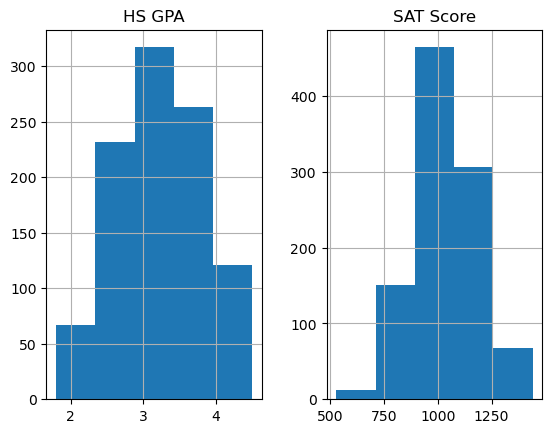

In [7]:
data.hist(bins=5)

In [8]:
data.corr()

,HS GPA,SAT Score
HS GPA,1.000000,0.429649
SAT Score,0.429649,1.000000


In [16]:
y = data['HS GPA'].values.reshape(-1,1)
x = data['SAT Score'].values.reshape(-1,1)

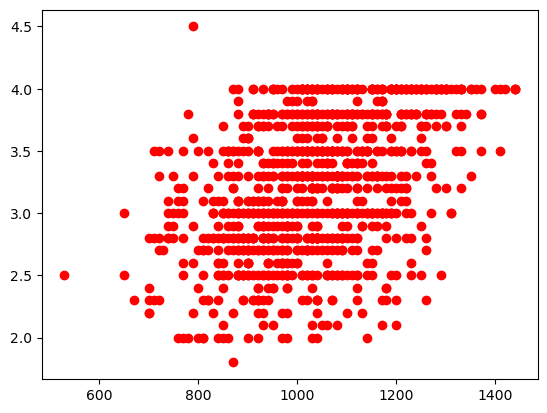

In [17]:
plt.scatter(x,y, color = 'red')
plt.xlabel = "SAT Score"
plt.ylabel = 'HS GPA'

In [18]:
from sklearn.model_selection import train_test_split

In [58]:
xtr, xts, ytr,yts = train_test_split(x, y, test_size=0.3, random_state=100)

In [59]:
print("xtrain", xtr.shape)
print("xtest", xts.shape)
print("ytrain", ytr.shape)
print("ytest", yts.shape)

xtrain (700, 1)
xtest (300, 1)
ytrain (700, 1)
ytest (300, 1)


In [60]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

model = lr.fit(xtr, ytr)

In [61]:
ypred = model.predict(xts)

In [91]:
yts[1:10]

array([[2.1],
       [3.7],
       [2.5],
       [3.8],
       [3. ],
       [4. ],
       [2.6],
       [2.2],
       [3.5]])

In [92]:
ypred[1:10]


array([[3.41811802],
       [3.19086374],
       [2.88244722],
       [3.23956109],
       [3.30449088],
       [3.20709619],
       [3.09346905],
       [3.35318822],
       [3.45058291]])

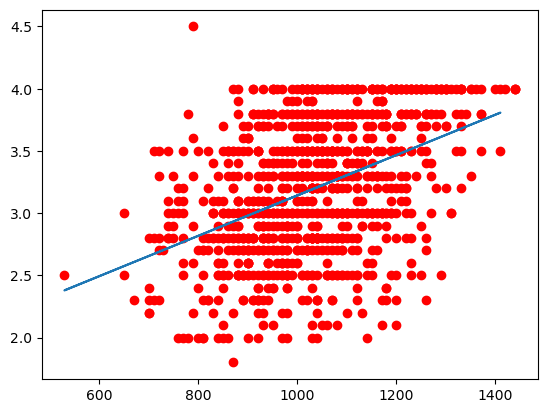

In [72]:
plt.scatter(x,y, color = 'red')
plt.plot(xts, ypred)
plt.xlabel = "SAT"
plt.ylabel= "gpa"

In [64]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [65]:
print(mean_absolute_error(yts,ypred))

0.40284406074021456


In [66]:
print(mean_squared_error(yts,ypred))

0.23691150375684175


In [67]:
from math import sqrt as sqrt
print(sqrt(mean_squared_error(yts,ypred)))

0.4867355583444071


In [68]:
r2 = r2_score(yts, ypred)

In [69]:
r2

0.19285344730291298

In [76]:
N = len(yts)
p =1

adjustedR2 =1 - ((1-r2)*(1-N)/(N-p-1))

In [77]:
adjustedR2

1.8098550981759363

In [83]:
model.predict([[1200], [1000], [800], [500], [200]])

array([[3.46681536],
       [3.1421664 ],
       [2.81751743],
       [2.33054398],
       [1.84357053]])

In [93]:
model.coef_

array([[0.00162324]])

In [94]:
model.intercept_

array([1.51892156])

In [95]:
import pickle

In [97]:
with open('D:\Apractice100\linearRegression\\bivariateLR.pkl', 'wb') as pikle_file:
    pickle.dump(model,pikle_file)
    

In [100]:
#to load the model saved
with open('D:\Apractice100\linearRegression\\bivariateLR.pkl', 'rb') as pikle_f:
    loded_model= pickle.load(pikle_f)

In [104]:
loded_model.predict([[1200]])

array([[3.46681536]])